In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#!pip install unrar
%cd /content/drive/MyDrive/myntradataset
!unrar x /content/drive/MyDrive/myntradataset/images.rar 

In [4]:
DATASET_PATH = "/content/drive/MyDrive/myntradataset/"
print(os.listdir(DATASET_PATH))

['images.rar', 'styles.csv', 'images']


In [5]:
data_path = "/content/drive/MyDrive/myntradataset/images/"
print(len(os.listdir(data_path)))

41906


['images.rar', 'styles.csv', 'images']
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg


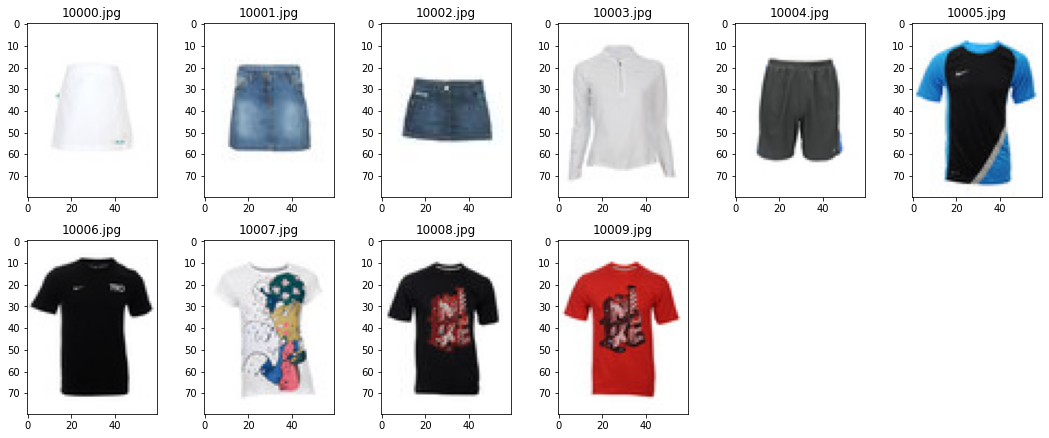

In [6]:
# what is inside the main directory
list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break

# what is in the image directory
imageIndex = os.listdir(DATASET_PATH+list_directory[index])
# print(type(imageIndex))
head = 10

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = len(sampleImages)/2
col = row+1

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+list_directory[index]+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

In [7]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=50000, error_bad_lines=False)
df.drop(df.columns[0], axis=1, inplace=True)
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [8]:
from keras.preprocessing.image import ImageDataGenerator

#image generator object from keras. reference : Keras Docs
image_generator = ImageDataGenerator(
    validation_split=0.2, rescale=1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True
)

#create a flow of images for training the model.
training_generator = image_generator.flow_from_dataframe(
    dataframe = df,
    directory= "/content/drive/MyDrive/myntradataset/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(224,224),
    batch_size=32,
    subset="training"

)

#create a flow of images for validating(testing) the trained model.
validation_generator = image_generator.flow_from_dataframe(
    dataframe = df,
    directory="/content/drive/MyDrive/myntradataset/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(224,224),
    batch_size=32,
    subset="validation"
)

Found 33525 validated image filenames belonging to 3 classes.
Found 8381 validated image filenames belonging to 3 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [10]:
from keras import layers,models
model1 = Sequential()
#model.add(Flatten(input_shape=(28, 28)))strides = (2,2),
model1.add(layers.Conv2D(16, (4,4),  activation = 'relu' , input_shape = (224,224,3)))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))


model1.add(Flatten())
model1.add(Dense(units=512, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units=128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units=3, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [11]:
history = model1.fit(training_generator, epochs=50, validation_data=validation_generator, steps_per_epoch=10, verbose=1)

Epoch 1/50
10/10 [==============================] - 159s 16s/step - loss: 1.0607 - accuracy: 0.4594 - val_loss: 1.0839 - val_accuracy: 0.2714
Epoch 2/50
10/10 [==============================] - 104s 12s/step - loss: 1.0475 - accuracy: 0.4938 - val_loss: 1.0368 - val_accuracy: 0.5069
Epoch 3/50
10/10 [==============================] - 102s 11s/step - loss: 1.0152 - accuracy: 0.4688 - val_loss: 0.9075 - val_accuracy: 0.5069
Epoch 4/50
10/10 [==============================] - 102s 11s/step - loss: 0.9176 - accuracy: 0.5031 - val_loss: 0.8253 - val_accuracy: 0.5069
Epoch 5/50
10/10 [==============================] - 104s 11s/step - loss: 0.7920 - accuracy: 0.5750 - val_loss: 0.7645 - val_accuracy: 0.5820
Epoch 6/50
10/10 [==============================] - 104s 11s/step - loss: 0.6917 - accuracy: 0.6781 - val_loss: 0.6575 - val_accuracy: 0.6975
Epoch 7/50
10/10 [==============================] - 102s 11s/step - loss: 0.6921 - accuracy: 0.7156 - val_loss: 0.6506 - val_accuracy: 0.7307
Epoch 

Text(0.5, 1.0, 'Accuracy evolution')

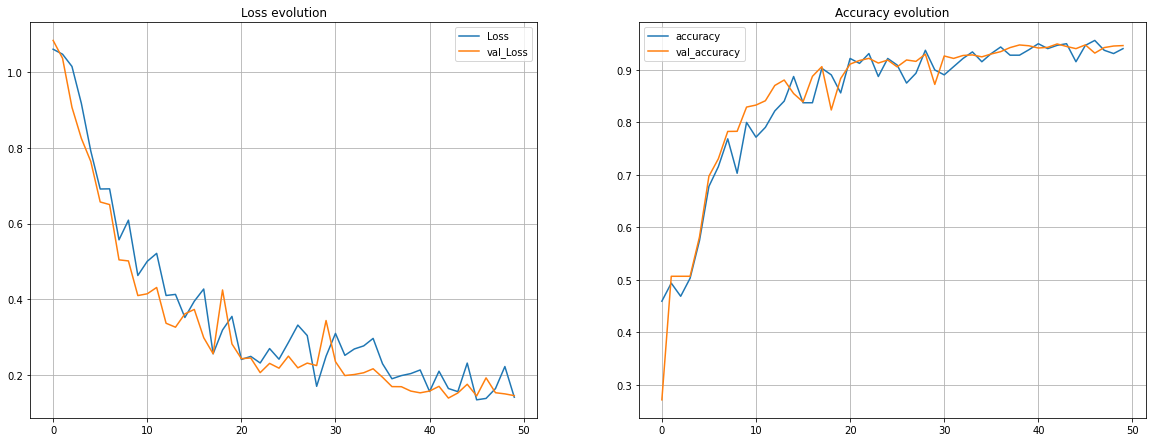

In [12]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.plot(model1.history.history['loss'], label='Loss')
plt.plot(model1.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model1.history.history['accuracy'], label='accuracy')
plt.plot(model1.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [13]:
model1.save('model6.h5')

In [14]:
from keras import models
model1 = models.load_model('model6.h5')

In [15]:
batch_size = 32
#!pip install tqdm
import tqdm
validation_generator.reset()
X_test, y_test = next(validation_generator)
for i in tqdm.tqdm(range(int(validation_generator.n/batch_size)-200)): 
  img, label = next(validation_generator)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

100%|██████████| 61/61 [00:49<00:00,  1.23it/s]

(1984, 224, 224, 3) (1984, 3)


In [16]:
#predicted_classes = model.predict_classes(X_test)

y_predict=model1.predict(X_test) 
predicted_classes=np.argmax(y_predict,axis=1)
#print(predicted_classes)

62/62 [==============================] - 1s 15ms/step


In [17]:
y_test = np.argmax(y_test, axis = 1)

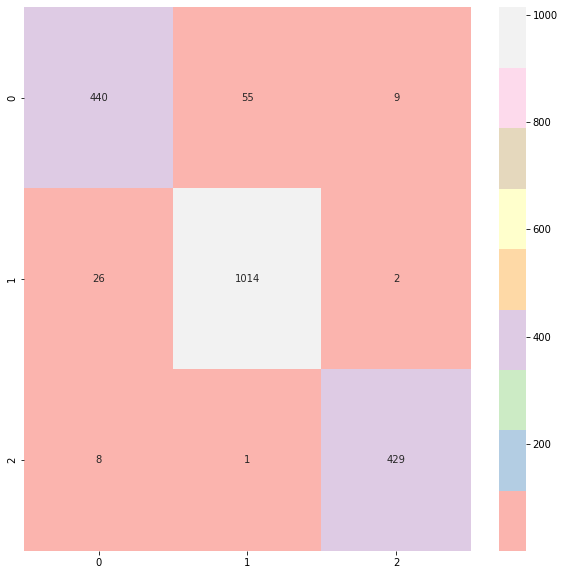

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, cmap = 'Pastel1', fmt='g')

In [22]:
cm_df = pd.DataFrame(cm)
cm_df.columns = [ 'Predicted Accessories','Predicted Apparel', 'Predicted Footwear']
cm_final_df = cm_df.rename(index={0: 'Actually Accessories', 1: 'Actually Apparel', 2: 'Actually Footwear'})
cm_final_df

,Predicted Accessories,Predicted Apparel,Predicted Footwear
Actually Accessories,440,55,9
Actually Apparel,26,1014,2
Actually Footwear,8,1,429


In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Precision = precision_score(y_test, predicted_classes,average='macro')
Recall = recall_score(y_test, predicted_classes,average='macro')
F1_score = f1_score(y_test, predicted_classes, average='macro')

df_metrix = pd.DataFrame(data = [(Precision, Recall, F1_score)], columns = ['Precision', 'Recall', 'F1_score'])
df_metrix

,Precision,Recall,F1_score
0,0.950311,0.941866,0.945748
